#### create training dataset from aeon raw data

In [ ]:
# exp 0.2
# solo BAA-1101818 (tail+ear painted)
# 2022-06-23 08:39:04.261089801	BAA-1101818	26.4	Enter 
# 2022-06-23 11:14:46.121759892	BAA-1101818	28.0	Exit
# 2022-06-24 09:32:37.183360100	BAA-1101818	26.9	Enter (ear repainted)
# 2022-06-24 12:29:54.365859985	BAA-1101818	27.8	Exit

# solo BAA-1101819
# 2022-06-21 13:28:10.593659878	BAA-1101819	25.4	Enter
# 2022-06-21 16:34:29.241280079	BAA-1101819	26.4	Exit

# multianimal BAA-1101818 and BAA-1101819
# 2022-06-22 10:40:00	        BAA-1101819	24.9	Enter
# 2022-06-22 13:29:04.050240040	BAA-1101818	28.4	Exit 
# 2022-06-23 11:24:23.876420021	BAA-1101819	25.6	Enter
# 2022-06-23 14:19:39.241819859	BAA-1101818	26.4	Exit

# exp 0.3
# multianimal BAA-1102505 and BAA-1102506
# 1904-01-03 22:03:16.696000000	BAA-1102505	20	Enter
# 1904-01-03 22:03:30.928000000	BAA-1102506	20	Enter
# 1904-01-03 23:57:31.952000000	BAA-1102505	20	Exit
# 1904-01-03 23:57:37.824000000	BAA-1102506	20	Exit



In [1]:
import pandas as pd
import aeon.io.api as aeon

from aeon.schema.dataset import exp02
from aeon.analysis.utils import *
from scipy import stats


# function to retrieve aeon data
def get_raw_tracking_data(root, subj_id, start, end):
    subj_video = aeon.load(root, exp02.CameraTop.Video, start=start, end=end)
    subj_pos = aeon.load(root, exp02.CameraTop.Position, start=start, end=end) 
    subj_data = pd.merge_asof(subj_video, subj_pos, left_index=True, right_index=True, direction="nearest", tolerance=pd.Timedelta("1ms"))[['x','y','id','area','_frame','_path']]
    subj_data.dropna(inplace=True)
    subj_data["id"] = subj_id
    return subj_data

# function to sample n number of data from x number of bins
def sample_n_from_bins(subj_data, n=3, bin_size=50):
    hist_data = stats.binned_statistic_2d(subj_data.x, subj_data.y, values=subj_data, statistic='count', bins=bin_size)
    subj_data["bin"] = hist_data.binnumber
    sampled_data = subj_data.groupby(["bin"]).sample(n=n, replace=True).drop_duplicates()
    return sampled_data

    

In [3]:
root = "/ceph/aeon/aeon/data/raw/AEON2/experiment0.2/"
subject = aeon.load(root, exp02.ExperimentalMetadata.SubjectState, start=pd.Timestamp("2022-06-01"), end=pd.Timestamp("2022-12-31"))
subject = subject[subject.id.str.startswith("BAA")]
subject = subject[subject.event != "Remain"]
subject = visits(subject)
subject

,id,weight_enter,weight_exit,enter,exit,duration
0,BAA-1101818,26.2,26.70,2022-06-21 10:27:42.615139961,2022-06-21 13:15:50.564740181,0 days 02:48:07.949600220
1,BAA-1101819,25.4,26.40,2022-06-21 13:28:10.593659878,2022-06-21 16:34:29.241280079,0 days 03:06:18.647620201
2,BAA-1101818,24.5,28.40,2022-06-22 07:55:41.628640175,2022-06-22 13:29:04.050240040,0 days 05:33:22.421599865
3,BAA-1101819,24.9,26.90,2022-06-22 07:55:57.696700096,2022-06-22 13:29:13.682270050,0 days 05:33:15.985569954
4,BAA-1101818,26.4,28.00,2022-06-23 08:39:04.261089801,2022-06-23 11:14:46.121759892,0 days 02:35:41.860670091
5,BAA-1101818,28.0,26.40,2022-06-23 11:24:11.156350136,2022-06-23 14:19:39.241819859,0 days 02:55:28.085469723
6,BAA-1101819,25.6,27.50,2022-06-23 11:24:23.876420021,2022-06-23 14:19:47.293859959,0 days 02:55:23.417439938
7,BAA-1101818,26.9,27.80,2022-06-24 09:32:37.183360100,2022-06-24 12:29:54.365859985,0 days 02:57:17.182499885
8,BAA-1101823,27.9,27.90,2022-07-14 12:53:15.740799904,2022-07-14 16:35:05.846270084,0 days 03:41:50.105470180
9,BAA-1101821,25.0,26.00,2022-07-15 13:14:40.239679813,2022-07-15 15:47:44.568860054,0 days 02:33:04.329180241


In [4]:
subj_id = "BAA-1101818"
subj_data = get_raw_tracking_data(root, subj_id, pd.Timestamp("2022-06-23 08:39:04.261089801"), pd.Timestamp("2022-06-23 11:14:46.121759892"))
subj_data = sample_n_from_bins(subj_data)
subj_data.to_csv(subj_id + ".csv")

subj_id = "BAA-1101819"
subj_data = get_raw_tracking_data(root, subj_id, pd.Timestamp("2022-06-21 13:28:10.593659878"), pd.Timestamp("2022-06-21 16:34:29.241280079"))
subj_data = sample_n_from_bins(subj_data)
subj_data.to_csv(subj_id + ".csv")


In [1]:
import pandas as pd
import random
import sleap

from pathlib import Path
from sleap.io.dataset import Labels
from sleap.io.video import Video
from sleap.gui.suggestions import VideoFrameSuggestions
from sleap.nn.config import *
from sleap.nn.inference import main as sleap_track
from sleap.nn.inference import TopDownMultiClassPredictor, Predictor, TopDownPredictor

In [3]:
def generate_slp_dataset(subj_id, skeleton, suggest_labels=False):
    # load csv file as pandas dataframe
    subj_data = pd.read_csv(subj_id + ".csv")

    # create a new track
    track = sleap.Track(spawned_on=0, name=subj_id)

    # create new labels dataset
    new_labels = sleap.Labels(
        labeled_frames = [],
        videos = [sleap.Video.from_filename(vid) for vid in subj_data._path.unique()],
        skeletons = [skeleton],
    )

    lfs = []
    if suggest_labels:
        # generate labelling suggestions
        suggestions = VideoFrameSuggestions.suggest(
            labels=new_labels,
            params=dict(
                videos = new_labels.videos,
                method = "image_features",
                per_video = 200,
                sample_method = "stride",
                scale = 1.0,
                merge_video_features = "parallel", # "across all videos"
                feature_type = "brisk",
                pca_components = 5,
                n_clusters = 10,
                per_cluster = 20,
            )
        )
        # create a new labeled frame for each suggestion
        for suggestion in suggestions:
            data = subj_data[
                (subj_data["_path"] == suggestion.video.filename)
                & (subj_data["_frame"] == suggestion.frame_idx)
            ]
            if len(data): # if frame is found
                data = data.iloc[0]
                lf = sleap.instance.LabeledFrame(
                    video=suggestion.video,
                    frame_idx=suggestion.frame_idx,
                    instances=[
                        sleap.Instance(
                            skeleton=skeleton,
                            track=track,
                            points={"centroid": sleap.instance.Point(data.x, data.y)},
                        )
                    ],
                )
                lfs.append(lf)
    else:
        # create video dictionary from new labels
        video_dict = {}
        for video in new_labels.videos:
            video_dict[video.filename] = video

        # create a new labeled frame for each row in subj_data
        for _, row in subj_data.iterrows():
            # create a new labeled frame
            lf = sleap.instance.LabeledFrame(
                video=video_dict[row._path],
                frame_idx=row._frame,
                instances=[
                    sleap.Instance(
                        skeleton=skeleton,
                        track=track,
                        points={"centroid": sleap.instance.Point(row.x, row.y)},
                    )
                ],
            )
            lfs.append(lf)

    return sleap.Labels(labeled_frames=lfs)


In [15]:
# create new skeleton
skeleton = sleap.Skeleton()
skeleton.add_node("centroid")

# generate slp datasets for each subject
b818 = generate_slp_dataset("BAA-1101818", skeleton)
b819 = generate_slp_dataset("BAA-1101819", skeleton)
 
# merge slp datasets
merge_results = Labels.complex_merge_between(b818, b819)

# save new labels file
subj_id = "BAA-1101818_819"
sleap.Labels.save_file(b818, subj_id + ".slp")
   

#### train

In [2]:
# set initial parameters
subj_id = "BAA-1101818_819"
run_name_centroid = subj_id + "_topdown_top.centroid2"
run_name_centered_instance = subj_id + "_topdown_top.centered_instance_multiclass2"
runs_folder = "models"

try:
    skeleton
except NameError:
    # create new skeleton
    skeleton = sleap.Skeleton()
    skeleton.add_node("centroid")

In [ ]:
# split labels into train/val/test
labels = sleap.load_file(subj_id + ".slp")

# generate a 0.8/0.1/0.1 train/val/test split
labels_train, labels_val_test = labels.split(n=0.8) 
labels_val, labels_test = labels_val_test.split(n=0.5)

# Save with images
labels_train.save(subj_id + ".train.pkg.slp")#, with_images=True)
labels_val.save(subj_id + ".val.pkg.slp")#, with_images=True)
labels_test.save(subj_id + ".test.pkg.slp")#, with_images=True)

In [ ]:
# centroid model
# initalise default training job config
cfg = TrainingJobConfig()
cfg.data.labels.training_labels = subj_id + ".train.pkg.slp"
cfg.data.labels.validation_labels = subj_id + ".val.pkg.slp"
cfg.data.labels.test_labels = subj_id + ".test.pkg.slp"

# preprocessing and training params
cfg.data.preprocessing.input_scaling = 0.75 #0.5
cfg.data.instance_cropping.center_on_part = "centroid"
cfg.data.instance_cropping.crop_size = 128 # set crop size manually
cfg.optimization.augmentation_config.rotate = True
cfg.optimization.epochs = 600 #200
cfg.optimization.batch_size = 4

cfg.optimization.initial_learning_rate = 0.0001
cfg.optimization.learning_rate_schedule.reduce_on_plateau = True
cfg.optimization.learning_rate_schedule.reduction_factor = 0.5
cfg.optimization.learning_rate_schedule.plateau_min_delta = 1e-06 
cfg.optimization.learning_rate_schedule.plateau_patience = 20 #5
cfg.optimization.learning_rate_schedule.plateau_cooldown = 3
cfg.optimization.learning_rate_schedule.min_learning_rate = 1e-08

cfg.optimization.early_stopping.stop_training_on_plateau = True
cfg.optimization.early_stopping.plateau_min_delta = 1e-08
cfg.optimization.early_stopping.plateau_patience = 30 #20

# configure nn and model
cfg.model.backbone.unet = UNetConfig(
    max_stride=16,
    filters=16,
    filters_rate=2.00,
    output_stride=2,
    #up_interpolate=True, # save computations but may lower accuracy
)
cfg.model.heads.centroid = CentroidsHeadConfig(
    anchor_part="centroid",
    sigma=2.5,
    output_stride=2
)

# configure outputs
cfg.outputs.run_name = run_name_centroid
cfg.outputs.save_outputs = True
cfg.outputs.runs_folder = runs_folder
cfg.outputs.save_visualizations = True
cfg.outputs.checkpointing.initial_model = True
cfg.outputs.checkpointing.best_model = True

trainer = sleap.nn.training.Trainer.from_config(cfg)
trainer.setup()
trainer.train()

In [ ]:
# part detection model: centered instance + multi-class
# initalise default training job config
cfg = TrainingJobConfig()

# update path to 0.8/0.1/0.1 train/val/test split
cfg.data.labels.training_labels = subj_id + ".train.pkg.slp"
cfg.data.labels.validation_labels = subj_id + ".val.pkg.slp"
cfg.data.labels.test_labels = subj_id + ".test.pkg.slp"
cfg.data.labels.skeletons = [skeleton] # load skeleton

# preprocessing and training params
cfg.data.preprocessing.input_scaling = 1.0
cfg.data.instance_cropping.center_on_part = "centroid"
cfg.data.instance_cropping.crop_size = 128 # set crop size manually
cfg.optimization.augmentation_config.rotate = True
cfg.optimization.epochs = 600
cfg.optimization.batch_size = 4

cfg.optimization.initial_learning_rate = 0.0001
cfg.optimization.learning_rate_schedule.reduce_on_plateau = True
cfg.optimization.learning_rate_schedule.reduction_factor = 0.1 #0.5
cfg.optimization.learning_rate_schedule.plateau_min_delta = 1e-08 #1e-06 
cfg.optimization.learning_rate_schedule.plateau_patience = 20 #5
cfg.optimization.learning_rate_schedule.plateau_cooldown = 3
cfg.optimization.learning_rate_schedule.min_learning_rate = 1e-08

cfg.optimization.early_stopping.stop_training_on_plateau = True
cfg.optimization.early_stopping.plateau_min_delta = 1e-08
cfg.optimization.early_stopping.plateau_patience = 25 #20

# configure nn and model
cfg.model.backbone.unet = UNetConfig(
    max_stride=16, #32,
    output_stride=2, #4,
    filters=16, #24,
    filters_rate=1.5,
    #up_interpolate=True, # save computations but may lower accuracy
)
confmaps=CenteredInstanceConfmapsHeadConfig(
    anchor_part="centroid",
    sigma=1.5, #2.5, 
    output_stride=2, #4, 
    loss_weight=0.001, 
)
class_vectors=ClassVectorsHeadConfig(
    classes = ["BAA-1101818", "BAA-1101819"],
    output_stride=2, #16, #4,
    num_fc_layers=3,
    num_fc_units=256,
    global_pool=True,
    loss_weight=0.5, # TODO: try 1.0
)
cfg.model.heads.multi_class_topdown = MultiClassTopDownConfig(
    confmaps=confmaps,
    class_vectors=class_vectors
)

# configure outputs
cfg.outputs.run_name = run_name_centered_instance
cfg.outputs.save_outputs = True
cfg.outputs.runs_folder = runs_folder
cfg.outputs.save_visualizations = True
cfg.outputs.checkpointing.initial_model = True
cfg.outputs.checkpointing.best_model = True

trainer = sleap.nn.training.Trainer.from_config(cfg)

trainer = sleap.nn.training.TopDownMultiClassModelTrainer.from_config(
    cfg, training_labels=labels
)

trainer.setup()
trainer.train()

In [ ]:
print(trainer.keras_model.outputs[0].shape) # confmaps  nx1x2
print(trainer.keras_model.outputs[1].shape) # id part nx2

#### predict

In [2]:
run_name_centroid = "BAA-1101818_819_topdown_top.centroid" # "gui_BAA-1101818_819230216_151204.centroid.n=1284"
run_name_centered_instance = "BAA-1101818_819_topdown_top.centered_instance_multiclass" # "gui_BAA-1101818_819230216_171800.centered_instance.n=1284"  

In [ ]:
# infer on random 1 min of video in slp dataset
subj_id = "BAA-1101818_819"	
#labels = sleap.load_file(subj_id + ".slp")

# select a random video from slp dataset and 
# infer on 3000 consecutive frames (1min) in the video
video = random.choice(labels.videos)
frame_from = random.randint(0, video.num_frames - 3000)
frame_idx = ",".join([str(idx) for idx in list(range(frame_from, frame_from + 3000))])
sleap_track(
    [
        video.filename,
        "--model",	"models/" + run_name_centroid,
        "--model",	"models/" + run_name_centered_instance,
        "--frames", frame_idx,
        "--output", "predictions/" + Path(video.filename).stem + "_pr.slp"
    ]
)

In [12]:
labels_pr = sleap.load_file("predictions/CameraTop_2022-06-21T13-00-00_pr.slp")

In [ ]:
# infer on multi-animal video
subj_id = "BAA-1101818_819"	

video = sleap.load_video("/ceph/aeon/aeon/data/raw/AEON2/experiment0.2/2022-06-22T08-51-10/CameraTop/CameraTop_2022-06-22T11-00-00.avi")

# infer on random 50 frames
frame_idx = ",".join([str(idx) for idx in random.sample(range(0, video.num_frames), 50)])

# infer on 3000 consecutive frames (1min) in the video
#frame_from = random.randint(0, video.num_frames - 3000)
#frame_idx = ",".join([str(idx) for idx in list(range(frame_from, frame_from + 3000))])

sleap_track(
    [
        video.filename,
        "--model",	"models/" + run_name_centroid,
        "--model",	"models/" + run_name_centered_instance,
        "--frames", frame_idx,
        "--output", "predictions/" + Path(video.filename).stem + "_pr.slp"
    ]
)

In [64]:
labels_pr = sleap.load_file("predictions/" + Path(video.filename).stem + "_pr.slp")
labels_pr.all_instances[0]

PredictedInstance(video=Video(filename=/ceph/aeon/aeon/data/raw/AEON2/experiment0.2/2022-06-22T08-51-10/CameraTop/CameraTop_2022-06-22T11-00-00.avi, shape=(179999, 1080, 1440, 3), backend=MediaVideo), frame_idx=81676, points=[centroid: (177.5, 548.2, 1.00)], score=0.72, track=Track(spawned_on=0, name='BAA-1101818'), tracking_score=0.00)

In [ ]:
# infer on entire video
predictor = TopDownMultiClassPredictor.from_trained_models(
    centroid_model_path="models/" + run_name_centroid,
    confmap_model_path="models/" + run_name_centered_instance,
)

video = sleap.load_video("/ceph/aeon/aeon/data/raw/AEON2/experiment0.2/2022-06-22T08-51-10/CameraTop/CameraTop_2022-06-22T11-00-00.avi")
labels_pr = predictor.predict(video, make_labels=True)
sleap.Labels.save_file(labels_pr, Path(video.filename).stem + "_pr.slp")



In [ ]:
# infer on selected frames
predictor = TopDownMultiClassPredictor.from_trained_models(
    centroid_model_path="models/" + run_name_centroid,
    confmap_model_path="models/" + run_name_centered_instance,
)
video = sleap.load_video("/ceph/aeon/aeon/data/raw/AEON2/experiment0.2/2022-06-22T08-51-10/CameraTop/CameraTop_2022-06-22T11-00-00.avi")
imgs = video[0:1]
labels_pr = predictor.predict(imgs, make_labels=True)
#sleap.Labels.save_file(labels_pr, Path(video.filename).stem + "_pr.slp")
labels_pr.all_instances

#### Scratch

In [7]:
import matplotlib.pyplot as plt

In [ ]:
# compare pos distributions between uniformly sampled and sleap suggested labels

# create new skeleton
skeleton = sleap.Skeleton()
skeleton.add_node("centroid")

# load uniformly sampled labels
manual_data = pd.read_csv("BAA-1101818.csv")

# generate label suggestions 
suggested_data = generate_slp_dataset("BAA-1101818b", skeleton, True)
suggested_data = pd.DataFrame(list(zip(
        [inst.points[0].x for inst in suggested_data.all_instances], 
        [inst.points[0].y for inst in suggested_data.all_instances]
    )),
    columns =['x', 'y'])

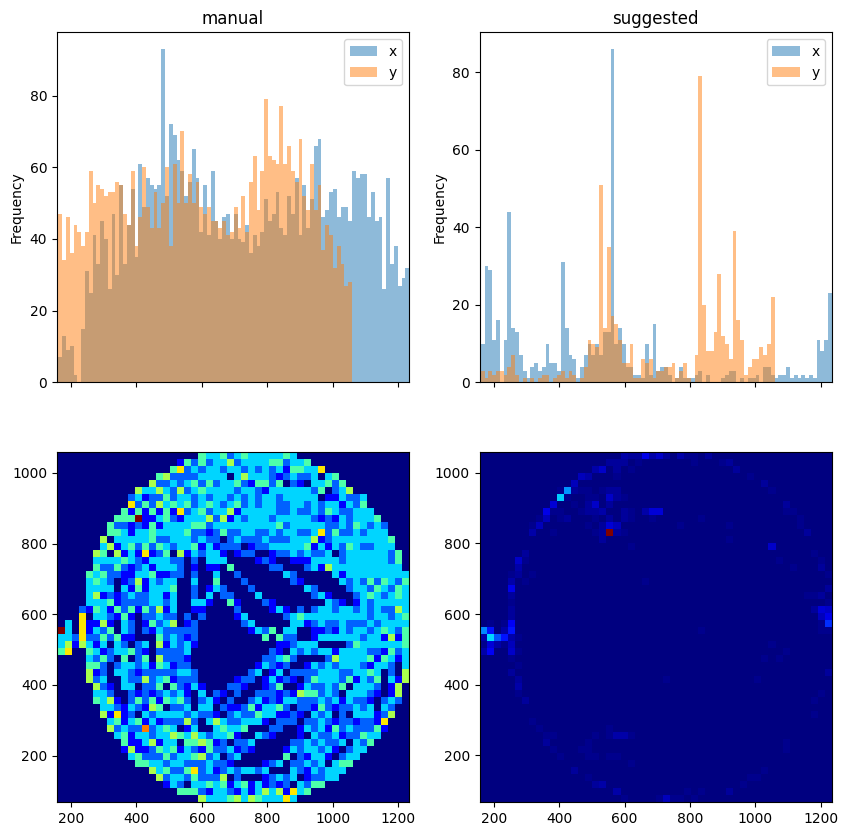

In [19]:
fig, ax = plt.subplots(2,2, figsize=(10,10), sharex=True)
manual_data[["x", "y"]].plot.hist(bins=100, alpha=0.5, ax=ax[0,0], title="manual")
suggested_data.plot.hist(bins=100, alpha=0.5, ax=ax[0,1], title="suggested")
ax[1,0].hist2d(manual_data.x, manual_data.y, bins=(50,50),cmap=plt.cm.jet)
ax[1,1].hist2d(suggested_data.x, suggested_data.y, bins=(50,50),cmap=plt.cm.jet)
plt.show()

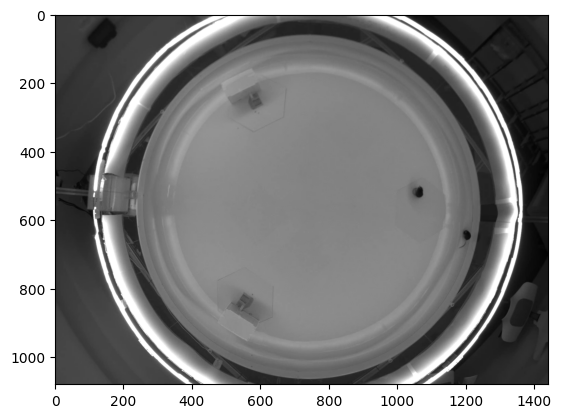

In [45]:
plt.imshow(video[94651][0])